In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import operator

In [74]:
anime = pd.read_csv("../data/anime.csv")
user = pd.read_csv("../data/rating.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# Data Preprocessing

In [3]:
# For the user data, get the mean rating of users of the animes
Mean_Rate_Per_User = user.groupby(['user_id']).mean().reset_index()
Mean_Rate_Per_User['mean_rating'] = Mean_Rate_Per_User['rating']
Mean_Rate_Per_User.drop(['anime_id','rating'],axis=1, inplace=True)

In [4]:
user = pd.merge(user,Mean_Rate_Per_User,on=['user_id','user_id'])

In [5]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [6]:
user = user.rename({'rating':'userRating'}, axis='columns')

In [7]:
user.head()

,user_id,anime_id,userRating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667


first need to check the datatypes of the columns

In [8]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
anime.shape

(12294, 7)

In [10]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

Most of the data type is reasonable, but the episodes shouldn't be object type, should be integer instead

Let check the unique values inside the episodes value

In [11]:
episodes = anime.episodes

In [12]:
episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

Now we know that the column include Unkown values, let's check total number of Unknow value

In [13]:
# check the number of Unknown values
(episodes=="Unknown").sum()

340

In [14]:
# check the portion of Unknown values
ep_percent=((episodes=="Unknown").sum()/len(episodes))*100
print(ep_percent,"%")


2.7655767040832924 %


There are only 2 persents of Unknow value, so just drop the unknown value

In [15]:
# replace the Unknown values with the mean of the episodes
median_epi=int(anime.loc[(anime["episodes"]!="Unknown"),"episodes"].median())

anime.loc[(anime["episodes"]=="Unknown"),"episodes"] = median_epi
anime.episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99', 2,
       '39', '101', '47', '50', '62', '33', '112', '23', '3', '94', '6',
       '8', '14', '7', '40', '15', '203', '77', '291', '120', '102', '96',
       '38', '79', '175', '103', '70', '153', '45', '5', '21', '63', '52',
       '28', '145', '36', '69', '60', '178', '114', '35', '61', '34',
       '109', '20', '9', '49', '366', '97', '48', '78', '358', '155',
       '104', '113', '54', '167', '161', '42', '142', '31', '373', '220',
       '46', '195', '17', '1787', '73', '147', '127', '16', '19', '98',
       '150', '76', '53', '124', '29', '115', '224', '44', '58', '93',
       '154', '92', '67', '172', '86', '30', '276', '59', '72', '330',
       '41', '105', '128', '137', '56', '55', '65', '243', '193', '18',
       '191', '180', '91', '192', '66', '182', '32', '164', '100', '296',
       '694', '95', '68', '117', '151', '130', '87', '

In [16]:
(anime.episodes=="Unknown").sum()

0

In [17]:
# check the unique value in type attribute
anime.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [18]:
anime.rating.isna().sum()

230

In [19]:
#drop the missing values in rating
anime = anime.drop(anime[anime.rating.isna()].index)

In [20]:
anime.shape

(12064, 7)

In [21]:
anime.rating.isna().sum()

0

# EDA

In [22]:
# firstly, let's transform the genre attribute into seprate columns
genre_word_freqmies = anime["genre"].str.get_word_freqmies(sep=", ")
anime = pd.concat([anime, genre_word_freqmies], axis=1)
anime.shape

(12064, 50)

In [23]:
dic = {}
for i in anime.columns[6:]:

    num_1 = anime.loc[anime[i]==1].shape[0]
    num_0 = anime.loc[anime[i]==0].shape[0]
    dic[i] = num_1
dic =dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))
dic

{'Comedy': 4575,
 'Action': 2768,
 'Adventure': 2316,
 'Fantasy': 2242,
 'Sci-Fi': 2036,
 'Drama': 1977,
 'Shounen': 1683,
 'Kids': 1598,
 'Romance': 1437,
 'Slice of Life': 1204,
 'School': 1176,
 'Hentai': 1133,
 'Supernatural': 1001,
 'Mecha': 929,
 'Music': 842,
 'Historical': 798,
 'Magic': 747,
 'Ecchi': 628,
 'Shoujo': 594,
 'Sports': 533,
 'Seinen': 532,
 'Mystery': 485,
 'Super Power': 451,
 'Military': 416,
 'Parody': 403,
 'Space': 377,
 'Horror': 362,
 'Harem': 313,
 'Demons': 287,
 'Martial Arts': 264,
 'Dementia': 238,
 'Psychological': 226,
 'Police': 195,
 'Game': 177,
 'Samurai': 146,
 'Vampire': 100,
 'Thriller': 86,
 'Cars': 72,
 'Shounen Ai': 62,
 'Shoujo Ai': 54,
 'Josei': 52,
 'Yuri': 41,
 'Yaoi': 38,
 'members': 0}

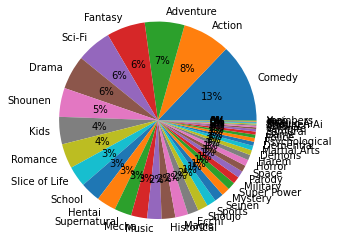

In [24]:
plt.pie( list(dic.values()),labels=list(dic.keys()),autopct='%1.0f%%')
plt.autoscale()

<AxesSubplot:>

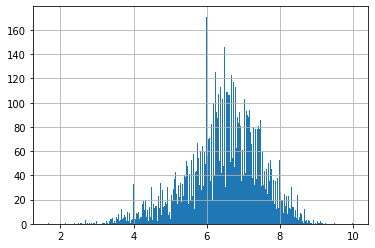

In [25]:
#check the distribution of the rating by range
anime.rating.astype(float).hist(bins=500)

In [26]:
#in order to make the data normalized, just drop the rating below 3, also the rating is not helpful because it means most people don't like the anime
anime = anime.drop(anime[anime.rating.astype(float)<2].index)

<AxesSubplot:>

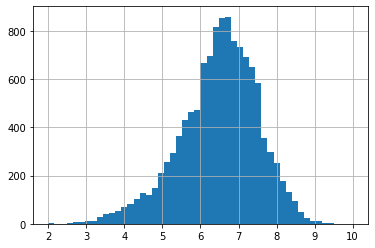

In [27]:
anime.rating.astype(float).hist(bins=50)

<AxesSubplot:>

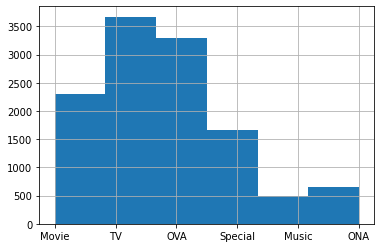

In [28]:
#check the distribution of the type attribute
anime.type.hist(bins=6)

In [29]:
# let's check the ditribution of the type value
type_pd = pd.get_word_freqmies(anime["type"])
dic = {}
for i in type_pd.columns:

    num_1 = anime.loc[type_pd[i]==1].shape[0]
    num_0 = anime.loc[type_pd[i]==0].shape[0]
    if num_1+num_0 != anime.shape[0]:
        print("error")
    else:
        dic[i] = num_1
dic =dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))
dic

{'TV': 3671,
 'OVA': 3285,
 'Movie': 2296,
 'Special': 1670,
 'ONA': 652,
 'Music': 488}

([<matplotlib.patches.Wedge at 0x1774c0850>,
 [Text(0.6343585717188146, 0.8986596700013112, 'TV'),
  Text(-1.0240607353404896, 0.40162122744433715, 'OVA'),
  Text(-0.5186154750571543, -0.9700711257589529, 'Movie'),
  Text(0.567439261904272, -0.9423442492261176, 'Special'),
  Text(1.0025871868271012, -0.45256925747350474, 'ONA'),
  Text(1.0911268222252424, -0.13943549698926921, 'Music')],
 [Text(0.34601376639208065, 0.490178001818897, '30%'),
  Text(-0.5585785829129942, 0.2190661240605475, '27%'),
  Text(-0.28288116821299325, -0.5291297049594288, '19%'),
  Text(0.3095123246750574, -0.5140059541233368, '14%'),
  Text(0.5468657382693278, -0.24685595862191162, '5%'),
  Text(0.5951600848501322, -0.07605572563051048, '4%')])

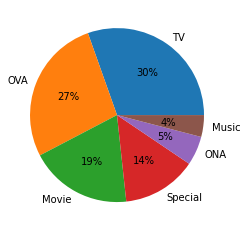

In [30]:
plt.pie( list(dic.values()),labels=list(dic.keys()),autopct='%1.0f%%')

<BarContainer object of 6 artists>

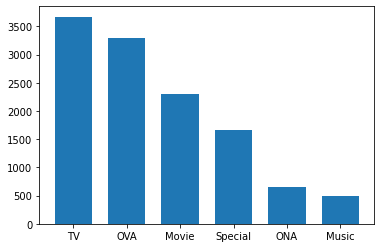

In [31]:
plt.bar(list(dic.keys()), dic.values(),width=0.7)

# Combine the table by key anime_id

In [32]:

mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata.head(10)
mergedata.shape

(4262556, 53)

In [33]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])

# Modeling Process

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [35]:
pca_df = pd.DataFrame(pca_samples)
pca_df.head()

,0,1,2
0,-1.590224,-0.518442,0.405764
1,-1.780142,-0.292790,0.145465
2,0.144932,-1.337129,-1.138000
3,0.191007,-0.379043,0.551686
4,3.513756,-0.484387,-0.906976


In [36]:
tocluster = pd.DataFrame(pca_df[[0,1,2]])

/var/folders/lh/gp1fc2qd2tv6cz3bf3fwl0z00000gn/T/ipykernel_79110/2303771990.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


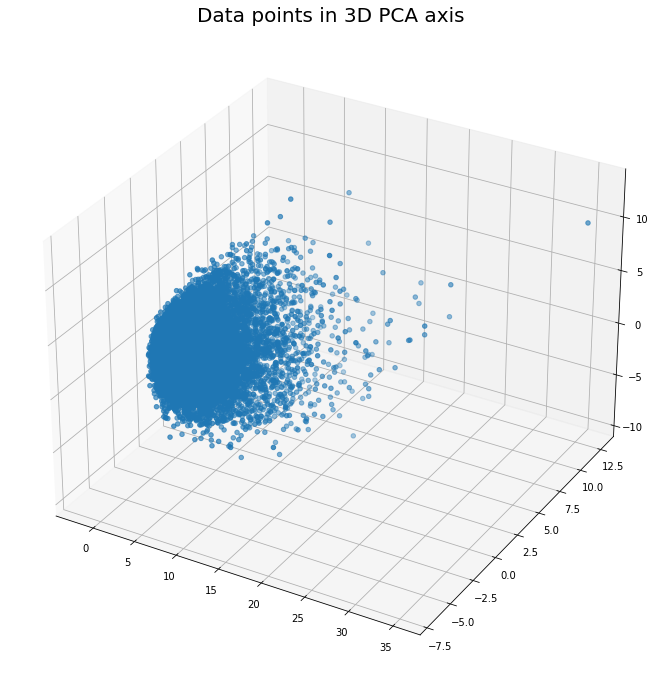

In [37]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics


silh_scores = []
cal_scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans_models = KMeans(n_clusters=i).fit(tocluster)
    kmeans_models.fit(tocluster)
    cal_score = metrics.calinski_harabasz_score(tocluster, kmeans_models.labels_)
    inertia_list[i] = kmeans_models.inertia_
    silh_score = silhouette_score(tocluster, kmeans_models.labels_)
    silh_scores.append(silh_score)
    cal_scores.append(cal_score)
    

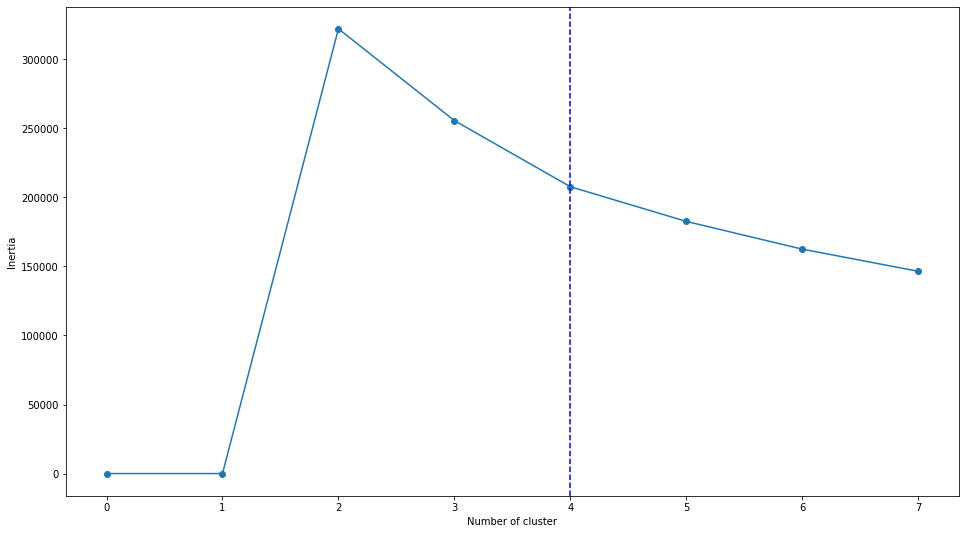

In [39]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

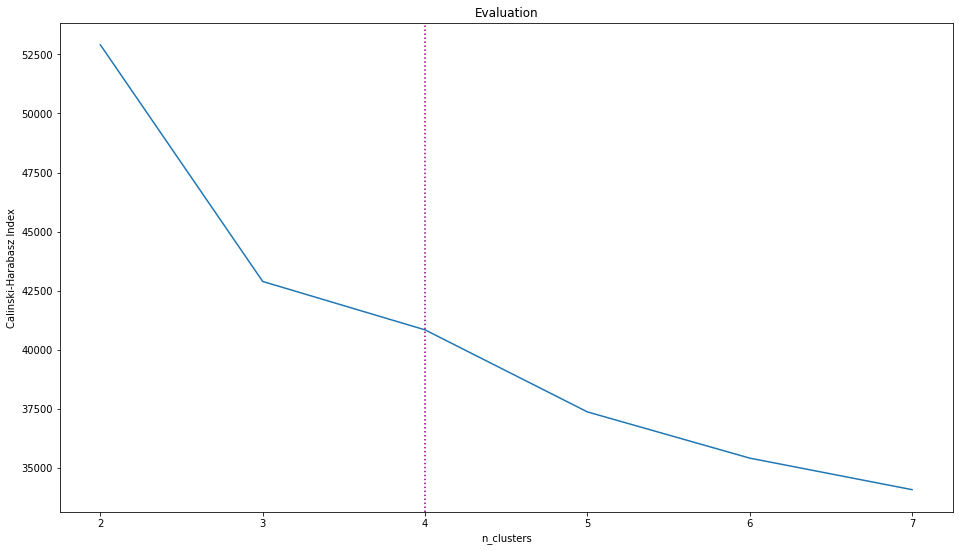

In [40]:
plt.plot(range(2,8), cal_scores);
plt.title('Evaluation')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='purple', linestyle='dotted')
plt.ylabel('Calinski-Harabasz Index');
plt.show()

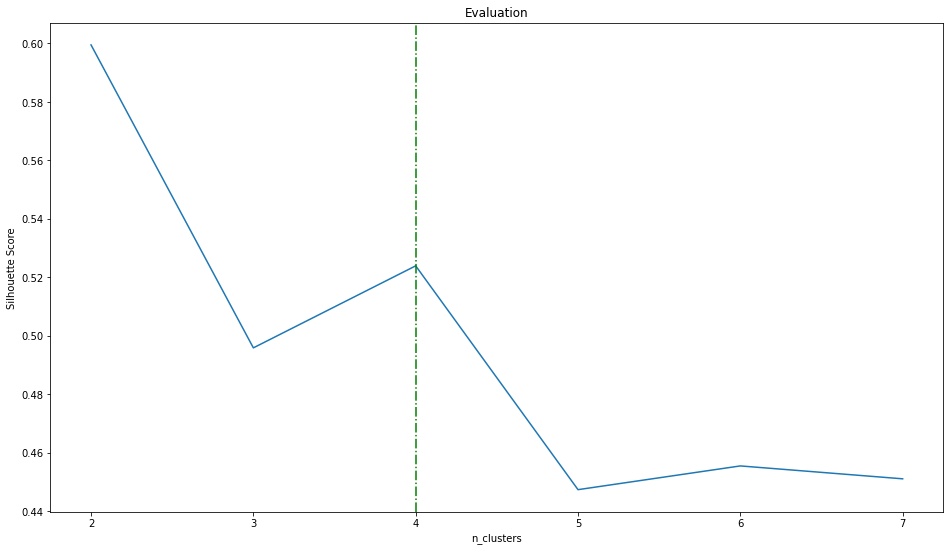

In [41]:
plt.plot(range(2,8), silh_scores);
plt.title('Evaluation')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='green', linestyle='-.')
plt.ylabel('Silhouette Score');
plt.show()

In [42]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[ 2.1179991  -1.29786523 -0.5733847 ]
 [-1.09827115 -0.0559864   0.08216575]
 [ 7.72159106 -0.40715574  1.08859625]
 [ 1.58928871  2.01533384 -0.09700687]]


/var/folders/lh/gp1fc2qd2tv6cz3bf3fwl0z00000gn/T/ipykernel_79110/1968849231.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


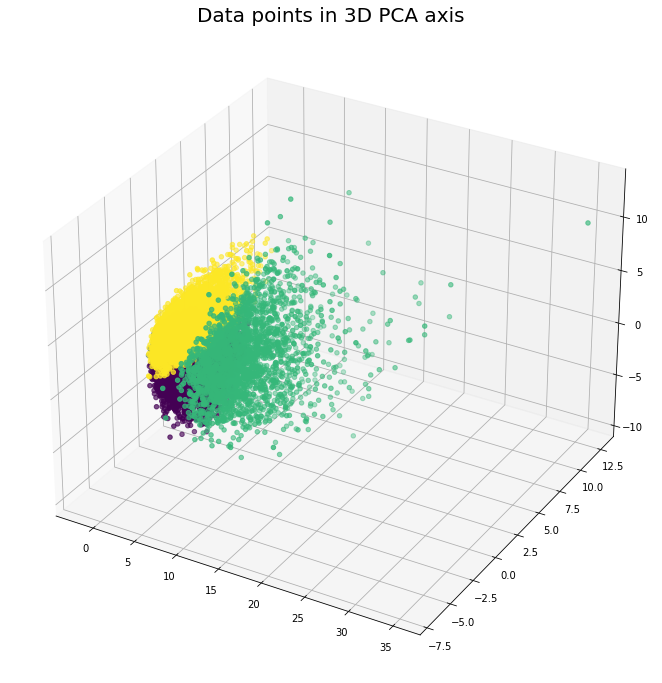

In [43]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

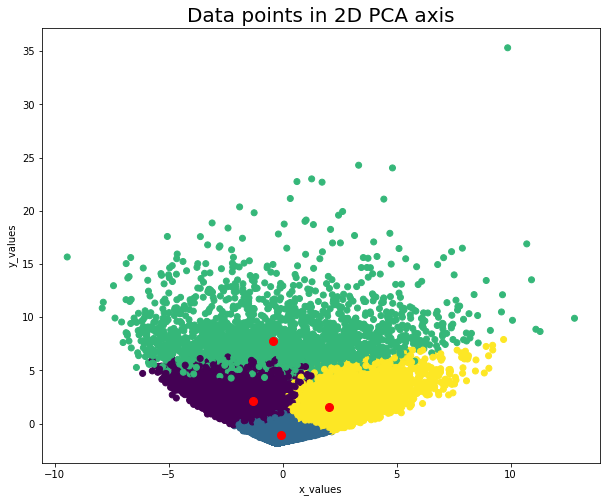

In [44]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [45]:
user_anime['cluster'] = c_preds

In [46]:
cluster_1 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
cluster_2 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
cluster_3 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
cluster_4 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

In [47]:
user_anime

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,makemagic,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
user.head()

,user_id,anime_id,userRating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667


In [49]:
user.user_id.unique().size

73515

In [50]:
cluster_1.head()

name
&quot;0&quot;                                                       0.000000
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu    0.000000
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi                 0.003359
&quot;Bungaku Shoujo&quot; Memoire                                  0.006998
&quot;Bungaku Shoujo&quot; Movie                                    0.017447
dtype: float64

In [51]:
anime.shape

(12062, 50)

In [52]:
cluster_1.shape

(10752,)

In [53]:
def createAnimeInfoList(animelist):
    genre_list = list()
    for x in anime['name']:
        if x in animelist:
            for y in anime[anime['name']==x].genre.values:
                genre_list.append(y)


    return genre_list

In [54]:
animelist = list(cluster_1.index)
data = pd.DataFrame()
data["genre"]=  createAnimeInfoList(animelist)

In [55]:
data

,genre
0,"Drama, Romance, School, Supernatural"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,"Action, Comedy, Historical, Parody, Samurai, S..."
3,"Sci-Fi, Thriller"
4,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
10750,Hentai
10751,Hentai
10752,Hentai
10753,Hentai


In [56]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [105]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(', '):              
        for s in [s for s in liste_keywords if s in liste ]: 
            if pd.notnull(s):
                keyword_count[s] += 1

    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [96]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(', ').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

# Cluster 1

In [97]:
cluster_1.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.719724
No Game No Life                                             0.641351
Sword Art Online                                            0.629222
Angel Beats!                                                0.612241
Death Note                                                  0.605057
Steins;Gate                                                 0.568949
Fullmetal Alchemist: Brotherhood                            0.554115
Toradora!                                                   0.532096
Code Geass: Hangyaku no Lelouch                             0.520620
Mirai Nikki (TV)                                            0.520153
Code Geass: Hangyaku no Lelouch R2                          0.493282
One Punch Man                                               0.491603
Tokyo Ghoul                                                 0.470703
Noragami                                                    0.465012
Ano Hi Mita Hana no Namae wo 

[['Comedy', 2307], ['Action', 1538], ['Fantasy', 1085], ['Shounen', 1063], ['Drama', 1058], ['Adventure', 1053], ['Romance', 1045], ['Sci-Fi', 994], ['School', 818], ['Supernatural', 683], ['Slice of Life', 611], ['Ecchi', 468], ['Magic', 442], ['Mecha', 432], ['Hentai', 360], ['Seinen', 359], ['Mystery', 344], ['Shoujo', 330], ['Super Power', 284], ['Harem', 278], ['Historical', 276], ['Military', 261], ['Sports', 254], ['Music', 244], ['Kids', 205], ['Parody', 178], ['Space', 178], ['Horror', 172], ['Psychological', 154], ['Martial Arts', 153], ['Demons', 146], ['Police', 122], ['Game', 100], ['Samurai', 79], ['Vampire', 75], ['Thriller', 69], ['Shounen Ai', 54], ['Shoujo Ai', 51], ['Josei', 44], ['Yaoi', 35], ['Dementia', 33], ['Cars', 27], ['Yuri', 16]]


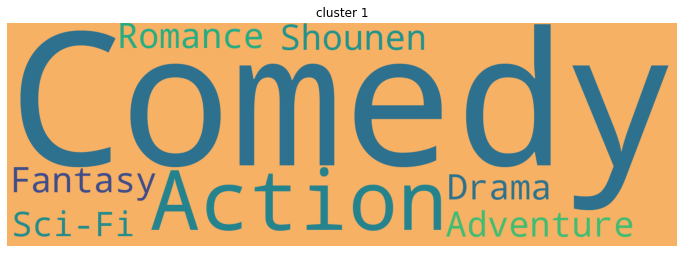

{'Comedy': 2307, 'Action': 1538, 'Fantasy': 1085, 'Shounen': 1063, 'Drama': 1058, 'Adventure': 1053, 'Romance': 1045, 'Sci-Fi': 994, 'School': 818, 'Supernatural': 683, 'Slice of Life': 611, 'Ecchi': 468, 'Magic': 442, 'Mecha': 432, 'Hentai': 360, 'Seinen': 359, 'Mystery': 344, 'Shoujo': 330, 'Super Power': 284, 'Harem': 278, 'Historical': 276, 'Military': 261, 'Sports': 254, 'Music': 244, 'Kids': 205, 'Parody': 178, 'Space': 178, 'Horror': 172, 'Psychological': 154, 'Martial Arts': 153, 'Demons': 146, 'Police': 122, 'Game': 100, 'Samurai': 79, 'Vampire': 75, 'Thriller': 69, 'Shounen Ai': 54, 'Shoujo Ai': 51, 'Josei': 44, 'Yaoi': 35, 'Dementia': 33, 'Cars': 27, 'Yuri': 16}


In [106]:
cluster_1_animelist = list(cluster_1.sort_values(ascending=False)[0:5000].index)
cluster_1_data = pd.DataFrame()
cluster_1_data['genre']=  createAnimeInfoList(cluster_1_animelist)
keyword_occurences, word_freq = count_word(cluster_1_data, 'genre', set_keywords)
print(keyword_occurences)
makeCloud(keyword_occurences[0:8],"cluster 1","#f7b165")
sorted_d = dict( sorted(word_freq.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_d)

# Cluster 2

In [99]:
cluster_2.sort_values(ascending=False)[0:15]

name
Death Note                            0.319221
Shingeki no Kyojin                    0.193869
Fullmetal Alchemist: Brotherhood      0.177693
Code Geass: Hangyaku no Lelouch       0.175358
Sword Art Online                      0.167747
Sen to Chihiro no Kamikakushi         0.163776
Fullmetal Alchemist                   0.154628
Angel Beats!                          0.151864
Elfen Lied                            0.148438
Code Geass: Hangyaku no Lelouch R2    0.147990
Naruto                                0.145168
Ouran Koukou Host Club                0.138316
Toradora!                             0.120234
Howl no Ugoku Shiro                   0.117061
Clannad                               0.112097
dtype: float64

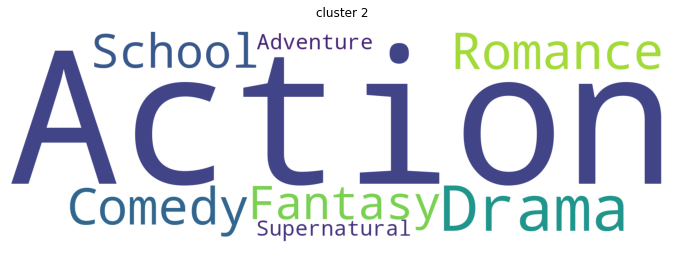

{'Action': 9, 'Drama': 9, 'Comedy': 6, 'Romance': 6, 'School': 5, 'Fantasy': 5, 'Supernatural': 5, 'Adventure': 5, 'Super Power': 4, 'Shounen': 4, 'Military': 4, 'Sci-Fi': 2, 'Psychological': 2, 'Magic': 2, 'Slice of Life': 2, 'Mecha': 2, 'Harem': 1, 'Horror': 1, 'Police': 1, 'Mystery': 1, 'Seinen': 1, 'Martial Arts': 1, 'Shoujo': 1, 'Thriller': 1, 'Game': 1, 'Yuri': 0, 'Samurai': 0, 'Music': 0, 'Ecchi': 0, 'Vampire': 0, 'Parody': 0, 'Hentai': 0, 'Josei': 0, 'Kids': 0, 'Dementia': 0, 'Yaoi': 0, 'Sports': 0, 'Historical': 0, 'Shounen Ai': 0, 'Demons': 0, 'Cars': 0, 'Shoujo Ai': 0, 'Space': 0}


In [107]:
cluster_2_animelist = list(cluster_2.sort_values(ascending=False)[0:15].index)
cluster_2_data = pd.DataFrame()
cluster_2_data['genre'] =  createAnimeInfoList(cluster_2_animelist)
keyword_occurences, word_freq = count_word(cluster_2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:8],"cluster 2","white")
sorted_d = dict( sorted(word_freq.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_d)

# Cluster 3

In [101]:
cluster_3.sort_values(ascending=False)[0:15]

name
Angel Beats!                          0.850665
Toradora!                             0.833073
Code Geass: Hangyaku no Lelouch       0.804926
Steins;Gate                           0.777170
Code Geass: Hangyaku no Lelouch R2    0.776388
Sword Art Online                      0.770524
Bakemonogatari                        0.762705
Shingeki no Kyojin                    0.759578
No Game No Life                       0.755668
Clannad                               0.738858
Death Note                            0.736122
Fullmetal Alchemist: Brotherhood      0.720876
Clannad: After Story                  0.711102
Hataraku Maou-sama!                   0.709539
Durarara!!                            0.685301
dtype: float64

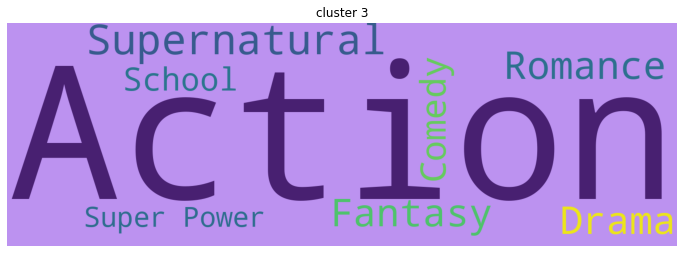

{'Action': 7, 'Supernatural': 7, 'Romance': 6, 'Drama': 6, 'Fantasy': 6, 'Comedy': 5, 'School': 4, 'Super Power': 3, 'Shounen': 3, 'Military': 3, 'Mystery': 3, 'Sci-Fi': 3, 'Slice of Life': 3, 'Adventure': 3, 'Thriller': 2, 'Game': 2, 'Mecha': 2, 'Ecchi': 1, 'Vampire': 1, 'Police': 1, 'Psychological': 1, 'Magic': 1, 'Demons': 1, 'Harem': 0, 'Yuri': 0, 'Horror': 0, 'Samurai': 0, 'Music': 0, 'Parody': 0, 'Hentai': 0, 'Josei': 0, 'Kids': 0, 'Seinen': 0, 'Martial Arts': 0, 'Dementia': 0, 'Yaoi': 0, 'Sports': 0, 'Shoujo': 0, 'Historical': 0, 'Shounen Ai': 0, 'Cars': 0, 'Shoujo Ai': 0, 'Space': 0}


In [108]:
cluster_3_animelist = list(cluster_3.sort_values(ascending=False)[0:15].index)
cluster_3_data = pd.DataFrame()
cluster_3_data['genre'] =  createAnimeInfoList(cluster_3_animelist)
keyword_occurences, word_freq = count_word(cluster_3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:8],"cluster 3","#bc92f0")
sorted_d = dict( sorted(word_freq.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_d)

# Cluster 4

In [103]:
cluster_4.sort_values(ascending=False)[0:15]

name
Death Note                            0.668321
Code Geass: Hangyaku no Lelouch       0.652753
Sen to Chihiro no Kamikakushi         0.584161
Code Geass: Hangyaku no Lelouch R2    0.583597
Fullmetal Alchemist                   0.565772
Tengen Toppa Gurren Lagann            0.524707
Suzumiya Haruhi no Yuuutsu            0.509702
Cowboy Bebop                          0.507333
Fullmetal Alchemist: Brotherhood      0.505979
Neon Genesis Evangelion               0.498759
Mononoke Hime                         0.498308
Elfen Lied                            0.479468
Howl no Ugoku Shiro                   0.472022
Toradora!                             0.463109
Samurai Champloo                      0.442464
dtype: float64

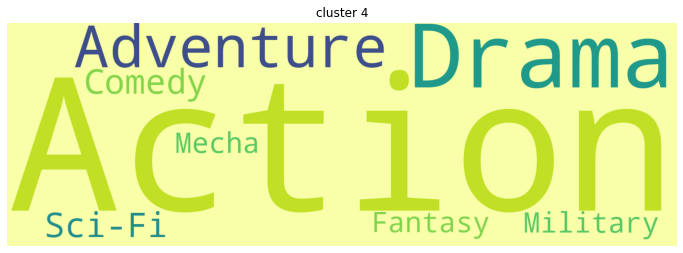

{'Action': 10, 'Drama': 8, 'Adventure': 8, 'Comedy': 6, 'Sci-Fi': 6, 'Military': 4, 'Fantasy': 4, 'Mecha': 4, 'Shounen': 3, 'School': 3, 'Romance': 3, 'Psychological': 3, 'Supernatural': 3, 'Super Power': 2, 'Mystery': 2, 'Magic': 2, 'Slice of Life': 2, 'Horror': 1, 'Samurai': 1, 'Police': 1, 'Parody': 1, 'Seinen': 1, 'Dementia': 1, 'Historical': 1, 'Thriller': 1, 'Space': 1, 'Harem': 0, 'Yuri': 0, 'Music': 0, 'Ecchi': 0, 'Vampire': 0, 'Hentai': 0, 'Josei': 0, 'Kids': 0, 'Martial Arts': 0, 'Yaoi': 0, 'Sports': 0, 'Shoujo': 0, 'Shounen Ai': 0, 'Game': 0, 'Demons': 0, 'Cars': 0, 'Shoujo Ai': 0}


In [109]:
cluster_4_animelist = list(cluster_4.sort_values(ascending=False)[0:15].index)
cluster_4_data = pd.DataFrame()
cluster_4_data['genre'] =  createAnimeInfoList(cluster_4_animelist)
keyword_occurences, word_freq = count_word(cluster_4_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:8],"cluster 4","#f8ffa8")
sorted_d = dict( sorted(word_freq.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_d)